In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from uuid import uuid4

In [2]:
df = pd.read_csv('logs/r6-matches.log', header=None, names=['player_id', 'match_id', 'operator_id', 'nb_kills'])

In [3]:
df.shape

(55833, 4)

In [4]:
df.isnull().sum()

player_id      0
match_id       0
operator_id    0
nb_kills       0
dtype: int64

In [ ]:
df.operator_id.value_counts().sort_index()

operator_id
14     2358
24     2353
30     2309
46     2307
64     2356
72     2261
73     2302
84     2332
100    2302
107    2347
109    2355
112    2370
130    2278
132    2327
173    2368
193    2356
194    2367
211    2284
230    2366
233    2342
237    2348
241    2344
245    2260
253    2241
Name: count, dtype: int64

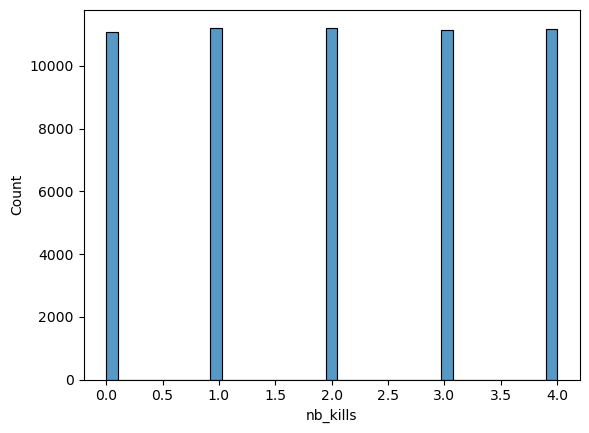

In [6]:
sns.histplot(data=df, x='nb_kills')
plt.show()

In [7]:
operators = df.operator_id.unique()
operators.sort()
operators

array([ 14,  24,  30,  46,  64,  72,  73,  84, 100, 107, 109, 112, 130,
       132, 173, 193, 194, 211, 230, 233, 237, 241, 245, 253])

operators = [ 14,  24,  30,  46,  64,  72,  73,  84, 100, 107, 109, 112, 130, 132, 173, 193, 194, 211, 230, 233, 237, 241, 245, 253 ]

In [8]:
operators_mean_kills = df[['operator_id', 'nb_kills']].groupby('operator_id').mean()
operators_mean_kills.sort_values(by='nb_kills')

,nb_kills
operator_id,
84,1.947256
73,1.959166
241,1.966724
130,1.972344
230,1.979290
24,1.980875
233,1.982067
193,1.990238
245,1.990708


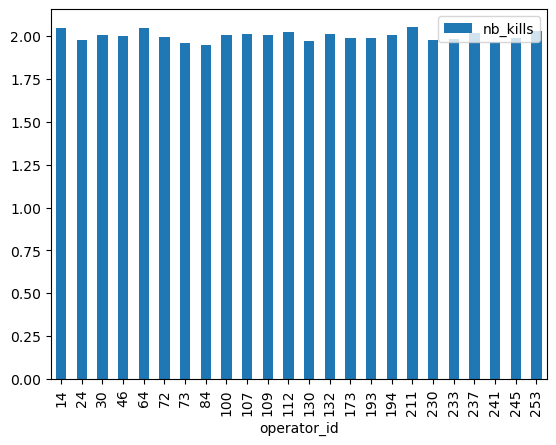

In [9]:
operators_mean_kills.plot(kind='bar')
plt.show()

In [10]:
len(df.match_id.unique())

1000

In [11]:
55833/1000

55.833

In [ ]:
df.match_id.value_counts()

match_id
506c9763-56ae-4184-b518-f4044dac2d80    82
cd7c0f25-eab9-4b90-9dfb-e39e1840cb31    81
b5bceb4c-e933-4fab-8461-da0b85d826d1    79
2c941a41-2b81-48bb-9231-5b5ff6c96928    79
ad94f1aa-3658-4571-b05f-c58558c43916    78
                                        ..
eca997a1-e0d3-4056-bc97-9ad5fbfe1b4e    32
d13e560e-da97-4181-b131-9da6bf2a7906    28
97d6e99d-97ca-45b8-9f91-2c0f37a6800e    25
1630d5db-9c39-435b-b307-c4d066d2c4a3    25
23cca365-72b0-467e-a8e9-3ef36e33c3a0    25
Name: count, Length: 1000, dtype: int64

In [13]:
# Techinque de CamCam: copy no jutsu
30000000 / 1000

30000.0

In [14]:
match_ids = df.match_id.unique()
match_transformation = {
    match_id: str(uuid4()) for match_id in match_ids
}

player_ids = df.player_id.unique()
player_transformation = {
    player_id: str(uuid4()) for player_id in player_ids
}

transformations = {
    'match_id': match_transformation, 
    'player_id': player_transformation
}
df.copy().replace(transformations)

,player_id,match_id,operator_id,nb_kills
0,2a701965-61bc-465e-af5e-5d5e5c17dd99,0529caed-499d-4898-add6-66d9a99ee836,107,3
1,8908c2ef-d237-47aa-8349-ca742e92cb43,332c42ce-a1b4-4061-82a0-3581b5e59c4c,253,1
2,42581394-d493-4e23-a44a-5ec7be0b5c97,b1337cda-b953-42f5-a67d-9382f443e9e2,233,4
3,7d193480-6a18-49ab-9dfb-43fb96b5a294,81e9eeb7-b242-4f25-8695-5042b2aec2c8,72,4
4,13b4885c-e3c0-4457-b01e-0d4024498ca3,b657d116-11dc-4ed2-bd99-8e5ac9fba608,84,3
...,...,...,...,...
55828,2562dc81-eb64-4846-ac7b-d59ac10895d5,d6f0e69c-60da-4ea0-8101-41772b4979be,64,0
55829,f4201088-bf2a-4c51-bb95-420c16a37b31,79aa185f-d00d-4815-9d75-b43b44398fb6,24,2
55830,ffe8a0f0-fadc-4c5b-aeb1-9dade0493501,ae221e42-4596-459e-8b93-2894a160126f,253,0
55831,452b8491-e29d-47b8-bf9b-f4187fc5f973,62b7118a-154a-4a25-9060-b8e92880b415,233,0


operator_top100_YYYYMMDD.txt (both on the last 7 days.)

operator_id|match_id1:avg_kills1,match_id2:avg_kills2,...,match_id100:avg_kills100 

In [15]:
import tracemalloc
tracemalloc.start()

snapshot1 = tracemalloc.take_snapshot()

# Your code here
mean = df.groupby(['match_id', 'operator_id'])['nb_kills'].mean()


# Get the current memory usage
current, peak = tracemalloc.get_traced_memory()

print(f"Current memory usage: {current / (1024**2):.2f} MB")
print(f"Peak memory usage: {peak / (1024**2):.2f} MB")

snapshot2 = tracemalloc.take_snapshot()

top_stats = snapshot2.compare_to(snapshot1, 'lineno')

print("[ Top 5 differences ]")
for stat in top_stats[:5]:
    print(stat)

# Stop the tracemalloc
tracemalloc.stop()

mean



Current memory usage: 0.25 MB
Peak memory usage: 4.90 MB
[ Top 5 differences ]
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/pandas/core/groupby/ops.py:405: size=174 KiB (+174 KiB), count=2 (+2), average=87.1 KiB
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/pandas/core/dtypes/cast.py:978: size=43.6 KiB (+43.6 KiB), count=2 (+2), average=21.8 KiB
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/pandas/core/dtypes/cast.py:976: size=21.9 KiB (+21.9 KiB), count=2 (+2), average=10.9 KiB
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/pandas/core/algorithms.py:1517: size=8384 B (+8384 B), count=4 (+4), average=2096 B
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/ipykernel/iostream.py:684: size=1353 B (+1353 B), count=9 (+9), average=150 B


match_id                              operator_id
00236da6-e7a0-4d93-83ec-b14969a257ce  14             2.000000
                                      24             1.666667
                                      30             2.333333
                                      46             1.500000
                                      64             1.000000
                                                       ...   
ffcabedd-1eca-4f02-8dd4-28fd9133e87c  233            2.500000
                                      237            1.333333
                                      241            2.750000
                                      245            3.500000
                                      253            1.000000
Name: nb_kills, Length: 22285, dtype: float64

In [16]:
from pathlib import Path


tracemalloc.start()

snapshot1 = tracemalloc.take_snapshot()

# Your code here

path = Path('logs/test.log')

if not path.exists():
    path.parent.mkdir(parents=True, exist_ok=True)

    file = path.open(mode='a')

    df.to_csv(file, index=False, header=False)

    for i in range(10):
        match_ids = df.match_id.unique()
        match_transformation = {
            match_id: str(uuid4()) for match_id in match_ids
        }

        player_ids = df.player_id.unique()
        player_transformation = {
            player_id: str(uuid4()) for player_id in player_ids
        }

        transformations = {
            'match_id': match_transformation, 
            'player_id': player_transformation
        }
        df.copy().replace(transformations).to_csv(file, mode='a', index=False, header=False)


# Get the current memory usage
current, peak = tracemalloc.get_traced_memory()

print(f"Current memory usage: {current / (1024**2):.2f} MB")
print(f"Peak memory usage: {peak / (1024**2):.2f} MB")

snapshot2 = tracemalloc.take_snapshot()

top_stats = snapshot2.compare_to(snapshot1, 'lineno')

print("[ Top 5 differences ]")
for stat in top_stats[:5]:
    print(stat)

# Stop the tracemalloc
tracemalloc.stop()


Current memory usage: 0.00 MB
Peak memory usage: 0.05 MB
[ Top 5 differences ]
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/ipykernel/iostream.py:684: size=1241 B (+1241 B), count=7 (+7), average=177 B
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/codeop.py:126: size=759 B (+473 B), count=10 (+8), average=76 B
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/tracemalloc.py:560: size=296 B (+296 B), count=2 (+2), average=148 B
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/tracemalloc.py:423: size=296 B (+296 B), count=2 (+2), average=148 B
/home/martin/miniconda3/envs/r6-logs/lib/python3.12/site-packages/ipykernel/iostream.py:587: size=160 B (+160 B), count=1 (+1), average=160 B


In [17]:
def top_100_average_kills_per_operator(df: pd.DataFrame): 
    return (
        df.groupby(
            ['operator_id', 'match_id']
        )['nb_kills']
        .mean()
        .reset_index()
        .sort_values(
            by=['operator_id', 'nb_kills'], 
            ascending=[True, False]
        )
        .groupby(
            by='operator_id'
        )
        .head(100)
    )

def top_10_best_matchs_per_player(df: pd.DataFrame): 
    return (
        df.groupby(
            by=['player_id', 'match_id']
        )['nb_kills']
        .sum()
        .reset_index()
        .sort_values(
            by=['player_id', 'nb_kills'],
            ascending=[True, False]
        )
        .groupby(
            by='match_id'
        ).head(10)
    )

# top_100_average_kills_per_operator(df)
top_10_best_matchs_per_player(df)

,player_id,match_id,nb_kills
20,019e3442-b018-44a3-abf4-a7a72ae09c56,39145b0e-91de-479d-838a-e256fc32a913,27
46,019e3442-b018-44a3-abf4-a7a72ae09c56,799fec09-87fb-4f94-8c5b-dd6aa224077a,26
12,019e3442-b018-44a3-abf4-a7a72ae09c56,2d3a6e85-5f4e-4e86-b64e-8e8d491ba0b1,24
98,019e3442-b018-44a3-abf4-a7a72ae09c56,fbde1191-27c7-451e-a98c-c87ef0d40a48,24
47,019e3442-b018-44a3-abf4-a7a72ae09c56,79ad31ac-d36c-4f13-89e9-7d6001cbe585,23
...,...,...,...
9955,fec8ca0b-4461-4fc7-b12f-b08f60326490,a779e302-d37a-4b9e-8ceb-3bb1fafaeb2a,1
9885,fec8ca0b-4461-4fc7-b12f-b08f60326490,1cac0d83-62ce-4527-90f1-b08f1d946d5c,0
9927,fec8ca0b-4461-4fc7-b12f-b08f60326490,69fdcd03-aad6-4f07-8e3c-a1971af159a0,0
9944,fec8ca0b-4461-4fc7-b12f-b08f60326490,8928b85b-2c3d-49a6-9792-5ed7d36b2492,0


In [18]:
tracemalloc.start()
test_df = pd.read_csv('logs/test.log', header=None, names=['player_id', 'match_id', 'operator_id', 'nb_kills'])

top_avg_kills = top_100_average_kills_per_operator(test_df)
top_best_matchs = top_10_best_matchs_per_player(test_df)


current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Peak memory usage: {peak / (1024**2):.2f} MB")

Peak memory usage: 67.67 MB


In [19]:
chunksize = 10 ** 5

chunked_df = pd.read_csv('logs/test.log', header=None, names=['player_id', 'match_id', 'operator_id', 'nb_kills'], chunksize=chunksize)

In [20]:
type(chunked_df)

pandas.io.parsers.readers.TextFileReader

In [21]:
chunk = chunked_df.get_chunk()

In [22]:
type(chunk)

pandas.core.frame.DataFrame

In [23]:
import tempfile
def store_tempfile(df:pd.DataFrame): 

    with tempfile.NamedTemporaryFile(mode='w', suffix='.csv', delete=False) as temp_file:
        df.to_csv(temp_file, index=False, header=True)
        temp_file_path = temp_file.name

        return temp_file_path

In [24]:
temp_file_path = store_tempfile(top_100_average_kills_per_operator(chunk))

In [25]:
pd.read_csv(temp_file_path)

,operator_id,match_id,nb_kills
0,14,0240b2df-ba89-4a1a-b491-a3c34a9e9c86,4.0
1,14,034e52a5-243e-4174-8142-488a47946814,4.0
2,14,055b422d-f92e-4ea3-a159-4d7589ae9cea,4.0
3,14,0644773a-b238-49ea-800c-2f8460cb09ce,4.0
4,14,07d730b7-bed7-438a-967d-04b568334b05,4.0
...,...,...,...
2395,253,cbe05160-7e05-4922-aa0e-74d1b0b0b7ca,4.0
2396,253,cf15539c-999a-4a72-8534-3b2397a9d4c2,4.0
2397,253,d1a65a56-e25e-4c29-a2cf-b274174efbf2,4.0
2398,253,d3a823d6-ae68-4d56-87e0-0d12bb1e8d67,4.0
